# <span style="color:blue"> Scientific Data Analysis Final Project </span>

**Project Group #:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;10<br>
**Group Members:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Saffron Birch(100795118), Victor Ma(100789474), Nicholas Panait(100776699), and Ji Long Alden Chan(100783638)<br><br>

## <span style="color:blue"> Introduction: </span>
**Why did you choose this dataset over others?**<br>
>The main reason why we choose this dataset over others was because the dataset is on a topic that we found interesting. This combined with the fact that the dataset contains 20058 points of data with 16 attributes, makes it a very useful dataset for analysis. Another reason we choose to do a dataset on chess rather than something else is the value of data analysis in something as complex as chess. In chess, there is more variation the more moves you make, because of this it is easy to see which moves are better earlier on.

**What are the data analysis questions you want to use this dataset for?**<br>
>1. Are the chances of winning the game greater if you are playing white? If so, why is that?

>2. Does the number of moves affect the outcome of the game? If the number of moves played goes over the average number of moves, what is the most likely outcome of the match? What if the number of moves is below average?

>3. How do the following victory statuses correlate with rating? Find the correlation coefficient and determine whether the relationship is strong/weak and positive/negative. What conclusions can be drawn from the data collected?<br>
>  a) Checkmate<br>
>  b) Resignation<br>
>  c) Timeout <br>

>4. List the top 5 highest win rate openings, what are their win rates? Do their win rates vary depending on piece colour? List the top 5 players that use the combination of these openings the most, what are their win rates and rating? What conclusions can be drawn from the data collected? 

>5. What is the relationship between the least and most common chess openings and their play rates? Does the trend indicate increasing or decreasing volatility in victory results? What conclusions can be drawn from the data collected?

>6. Is there a correlation between how many variations an opening has and how often it is played? 

**What did each team member do?**

## <span style="color:blue"> Description of the Data: </span>
**Dataset Link:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://www.kaggle.com/datasnaek/chess/<br>
**Dataset Name:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Chess Game Dataset(Lichess)<br>
**Dataset Description:** This dataset holds the records of over 20000 games of chess played on [Lichess](https://lichess.org/) collected using the [Lichess API](https://github.com/ornicar/lila).<br>
**Dataset Attributes:** <br>
>**id** : The ID associated with the game in Lichess's database of games.<br>
>**rated** : Whether the game played was casual or worth rating.<br>
>**created_at** : The time in seconds that the game was created.<br>
>**last_move_at** : The time in seconds that the last move of the game was played and it finished.<br>
>**turns** : The total number of turns played in the game.<br>
>**victory_status** : How the game was won, by timeout, checkmate, resignation or if it was a draw.<br>
>**winner** : The colour pieces won the match or whether it was a draw.<br>
>**increment_code** : The time alloted for the match in the form: *Time limit per side in minutes* : *Seconds added to the time limit per move*.<br>
>**white_id** : The username of the person playing white.<br>
>**white_rating** : The rating of the person playing white.<br>
>**black_id** : The username of the person playing black.<br>
>**black_rating** : The rating of the person playing black.<br>
>**moves** : The moves played during that game in standard chess notation.<br>
>**opening_eco** : The unique standardized code given to every opening.<br>
>**opening_name** : The name of the opening played.<br>
>**opening_ply** : The number of moves in this specific opening.<br>

In [2]:
import csv
import re
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv():
    collection = []
    with open('games.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()

## <span style="color:blue"> Cleaning and Preprocessing of Data:</span>

**Unrated games are not qualitative games as you could have people testing things out or having fun and thus may skew results or act as outliers so we will remove them.**
> How many of these games were rated?<br>
> How many of these games were unrated?

In [3]:
rated_games = list(filter(lambda x : x["rated"] == "TRUE" or x["rated"] == "True", data))
print(str(len(rated_games)) + " games were rated.")
unrated_games = list(filter(lambda x : x["rated"] == "FALSE" or x["rated"] == "False", data))
print(str(len(unrated_games)) + " games were unrated.")
# Remove unrated as the quality of the games is low
data = rated_games
print("Number of games left after removing unrated games: "+str(len(data)))

16155 games were rated.
3903 games were unrated.
Number of games left after removing unrated games: 16155


**Games with large rating differences are also not qualitative games as someone more skilled could play pretty much any opening and still win simply because the skill gap is too large**.

In [4]:
# Remove games with a rating gap of more than 500
data = list(filter(lambda x: int(x["white_rating"])-int(x["black_rating"]) >= -500 and int(x["white_rating"])-int(x["black_rating"]) <= 500, data))
print("Number of games left after processing rating gap: "+str(len(data)))

Number of games left after processing rating gap: 15451


**There are odd cases in the dataset where the capitalizaiton of the strings are not consistent so we will lowercase all strings to make them easier to analyze.**

In [5]:
# Lowercase all of victory status and winner for easier processing
map(lambda x: x["winner"], data)
map(lambda x: x["victory_status"].lower(), data)

## <span style="color:blue"> Analyzing Our Data:</span>
>1.a How many chess games have been recorded in this dataset?<br>
>1.b What do the first 3 records look like?

In [6]:
print("There are " + str(len(data)) + " games recorded in this dataset.")
print("\nRecord 1:")
print(data[0])
print("\nRecord 2:")
print(data[1])
print("\nRecord 3:")
print(data[2])

There are 15451 games recorded in this dataset.

Record 1:
{'id': 'l1NXvwaE', 'rated': 'TRUE', 'created_at': '1.50413E+12', 'last_move_at': '1.50413E+12', 'turns': '16', 'victory_status': 'resign', 'winner': 'black', 'increment_code': '5+10', 'white_id': 'a-00', 'white_rating': '1322', 'black_id': 'skinnerua', 'black_rating': '1261', 'moves': 'd4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ Nxe5 c4 Bb4+', 'opening_eco': 'B00', 'opening_name': 'Nimzowitsch Defense: Kennedy Variation', 'opening_ply': '4'}

Record 2:
{'id': 'mIICvQHh', 'rated': 'TRUE', 'created_at': '1.50413E+12', 'last_move_at': '1.50413E+12', 'turns': '61', 'victory_status': 'mate', 'winner': 'white', 'increment_code': '5+10', 'white_id': 'ischia', 'white_rating': '1496', 'black_id': 'a-00', 'black_rating': '1500', 'moves': 'e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc6 bxc6 Ra6 Nc4 a4 c3 a3 Nxa3 Rxa3 Rxa3 c4 dxc4 d5 cxd5 Qxd5 exd5 Be6 Ra8+ Ke7 Bc5+ Kf6 Bxf8 Kg6 Bxg7 Kxg7 dxe6 Kh6 exf7 Nf6 Rxh8 Nh5 Bxh5 Kg5 Rxh7 K

>2.a How many moves was the longest game?<br>
>2.b How many moves was the shortest game?<br>

In [7]:
# print(data[0]["turns"])
most_moves = [];
for i in data:
#     print(i["turns"])
    most_moves.append(int(i["turns"]))
most_moves.sort()
print("The longest game had " + str(most_moves[len(most_moves)-1]) + " move(s).")
print("The shortest game had " + str(most_moves[0]) + " move(s).")

The longest game had 349 move(s).
The shortest game had 1 move(s).


>3.a How many games were won by checkmate?<br>
>3.b How many games were won by resignation?<br>
>3.c How many games were won by timeout?<br>
>3.d How many games were draws?<br>

In [8]:
checkmate_games = list(filter(lambda x : x["victory_status"] == "mate", data))
print(str(len(checkmate_games)) + " games were won by checkmate.")
resignation_games = list(filter(lambda x : x["victory_status"] == "resign", data))
print(str(len(resignation_games)) + " games were won by resignation.")
timeout_games = list(filter(lambda x : x["victory_status"] == "outoftime", data))
print(str(len(timeout_games)) + " games were won by timeout.")
draw_games = list(filter(lambda x : x["victory_status"] == "draw", data))
draw_games += list(filter(lambda x : x["victory_status"] == "outoftime" and x["winner"] == "draw", data))
print(str(len(draw_games)) + " games were draws.")

4870 games were won by checkmate.
8584 games were won by resignation.
1321 games were won by timeout.
714 games were draws.


>4.a Of all the games recorded in this data set, how many did white win?<br>
>4.b Of all the games recorded in this data set, how many did black win?<br>
>4.c Of all the games recorded in this data set, how many were a draw?

In [9]:
white_won = list(filter(lambda x : x["winner"] == "white", data))
print(str(len(white_won)) + " games were won by white.")
black_won = list(filter(lambda x : x["winner"] == "black", data))
print(str(len(black_won)) + " games were won by black.")
tie = list(filter(lambda x : x["winner"] != "white" and x["winner"] != "black", data))
print(str(len(tie)) + " games were a tie.")

7698 games were won by white.
7039 games were won by black.
714 games were a tie.


>5.a How many games had a time increment?<br>
>5.b Of the games that did have an increment, which increment was the most popular?<br>
>5.c How many games didn't have a time increment?<br>
>5.d Of the games that didn't have an increment, what was the most used time limit?

In [10]:
# 5.a
def has_increment(increment):
    time = increment["increment_code"].split("+")
    if (time[1] == "0"):
        return False
    return True
increment_games = list(filter(has_increment, data))
print(str(len(increment_games)) + " games had an increment.")

# 5.b
increments = []
counters = []
for i in increment_games:
    increment = i["increment_code"].split("+")
    new = True
    for j in range(len(increments)):
        if (increments[j] == increment[1]):
            counters[j] += 1
            new = False
            break
    if new:
        increments.append(increment[1])
        counters.append(1)
biggest = counters[0];
biggest_index = 0;
for i in range(1, len(counters)):
    if counters[i] > biggest:
        biggest = counters[i]
        biggest_index = i
print("A " + str(increments[biggest_index]) + " second increment was the most popular with " + str(biggest) + " games using it.")

# 5.c
def no_increment(increment):
    time = increment["increment_code"].split("+")
    if (time[1] == "0"):
        return True
    return False
no_increment_games = list(filter(no_increment, data))
print(str(len(no_increment_games)) + " games did not have an increment.")

#5.d
times = []
counters = []
for i in no_increment_games:
    time = i["increment_code"].split("+")
    new = True
    for j in range(len(times)):
        if (times[j] == time[0]):
            counters[j] += 1
            new = False
            break
    if new:
        times.append(time[0])
        counters.append(1)
biggest = counters[0];
biggest_index = 0;
for i in range(1, len(counters)):
    if counters[i] > biggest:
        biggest = counters[i]
        biggest_index = i
print(str(times[biggest_index]) + " minute time limits were the most popular with " + str(biggest) + " games using it.")

6569 games had an increment.
A 5 second increment was the most popular with 1551 games using it.
8882 games did not have an increment.
10 minute time limits were the most popular with 6493 games using it.


>6.a Who was the highest rated player for white?<br>
>6.b Who was the lowest rated player for white?<br>
>6.c Who was the highest rated player for black?<br>
>6.d Who was the lowest rated player for black?

In [11]:
white_ratings = []
black_ratings = []
for i in data:
    white_ratings.append(int(i["white_rating"]))
    black_ratings.append(int(i["black_rating"]))
white_ratings.sort()
black_ratings.sort()

highest_rated_white = ""
lowest_rated_white = ""
highest_rated_black = ""
lowest_rated_black = ""
for i in data:
    if int(i["white_rating"]) == white_ratings[len(white_ratings)-1]:
        highest_rated_white = i["white_id"]
    elif int(i["white_rating"]) == white_ratings[0]:
        lowest_rated_white = i["white_id"]
    if int(i["black_rating"]) == black_ratings[len(black_ratings)-1]:
        highest_rated_black = i["black_id"]
    elif int(i["black_rating"]) == black_ratings[0]:
        lowest_rated_black = i["black_id"]
    if highest_rated_white != "" and lowest_rated_white != "" and highest_rated_black != "" and highest_rated_black != "":
        break;
print("The highest rated player for white was " + highest_rated_white + " with a rating of " + str(white_ratings[len(white_ratings)-1]) + ".")
print("The lowest rated player for white was " + lowest_rated_white + " with a rating of " + str(white_ratings[0]) + ".")
print("The highest rated player for black was " + highest_rated_black + " with a rating of " + str(black_ratings[len(black_ratings)-1]) + ".")
print("The lowest rated player for black was " + lowest_rated_black + " with a rating of " + str(black_ratings[0]) + ".")

The highest rated player for white was blitzbullet with a rating of 2622.
The lowest rated player for white was ragnarlothbrook_spb with a rating of 784.
The highest rated player for black was avill050 with a rating of 2588.
The lowest rated player for black was hortense with a rating of 791.


>7.a What were the top 3 most played openings?<br>
>7.b How many moves was the longest opening played?<br>
>7.c How many moves was the shortest opening played?

In [12]:
openings = []
counters = []
for i in data:
    partition = ""
    if " | " in i["opening_name"]:
        partition = i["opening_name"].split(" | ")
        partition = partition[0].split(": ")
    else:
        partition = i["opening_name"].split(": ")
    new = True
    for j in range(len(openings)):
        if openings[j] == partition[0]:
            counters[j] += 1
            new = False
            break
    if new:
        openings.append(partition[0])
        counters.append(1)

# Since the list is being edited later
original_counters = counters

most_moves = int(data[0]["opening_ply"])
most_name = data[0]["opening_name"]
least_moves = int(data[0]["opening_ply"])
least_name = data[0]["opening_name"]
for i in data:
    if int(i["opening_ply"]) > most_moves:
        most_moves = int(i["opening_ply"])
        most_name = i["opening_name"]
    elif int(i["opening_ply"]) < least_moves:
        least_moves = int(i["opening_ply"])
        least_name = i["opening_name"]
big_3 = []
big_3_counter = []
for i in range(3):
    biggest = counters[0];
    biggest_index = 0;
    for i in range(1, len(counters)):
        if counters[i] > biggest:
            biggest = counters[i]
            biggest_index = i
    big_3_counter.append(counters[biggest_index])
    big_3.append(openings[biggest_index])
    openings.pop(biggest_index)
    counters.pop(biggest_index)
top_3 = tuple(zip(big_3, big_3_counter))
message = "The top 3 openings played are: \n"
for i in range(3):
    message += "\t" + str(i+1) + ". The " + str(top_3[i][0]) + ", played " + str(top_3[i][1]) + " times.\n"
print(message)
print("The opening with the most moves is the " + most_name + " with " + str(most_moves) + " moves.")
print("The opening with the least moves is the " + least_name + " with " + str(least_moves) + " moves.")

The top 3 openings played are: 
	1. The Sicilian Defense, played 2012 times.
	2. The French Defense, played 1077 times.
	3. The Queen's Pawn Game, played 801 times.

The opening with the most moves is the Ruy Lopez: Marshall Attack |  Modern Main Line with 28 moves.
The opening with the least moves is the Queen's Pawn with 1 moves.


## <span style="color:blue"> Exploratory Data Analysis:</span>
>**1. Are the chances of winning the game greater if you are playing white? If so, why is that?**

Yes, the chances of winning the game is greater when playing from the side of White.
In this dataset, white wins 49.82% of the time, black wins 45.56% of the time, and the game ends in a draw 4.62% of the time.
That makes a difference of 4.26% winrate between white over black.
This confirms the hypothesis that white has an inherent advantage in Chess due to having the first move over black.

In [23]:
white_winrate = round(((len(white_won)/len(data))*100),2)
black_winrate = round(((len(black_won)/len(data))*100),2)
neither_winrate = round(((len(tie)/len(data))*100),2)

print("White winrate: %.2f%%" % white_winrate)
print("Black winrate: %.2f%%" % black_winrate)
print("Neither: %.2f%%" % neither_winrate)

White winrate: 49.82%
Black winrate: 45.56%
Neither: 4.62%


>**2. Does the number of moves affect the outcome of the game? If the number of moves played goes over the average number of moves, what is the most likely outcome of the match? What if the number of moves is below average?**

>As shown by the graph, the number of moves does affect the outcome of the game.  If the number of moves played goes over the average number of moves (not including draws), then black is more likely to win.  On the other hand, if the number of moves is below average then white has a better chance of winning.

>To obtain this data, I had to first create a list containing the number of turns it took for each condition (white winning, black winning, draw game, total games).  This was achieved by using a filter to create a list of games where the condition is true, then using a for loop to make each element of the list only contain the number of turns.  Finally, I had to get the average turns for each condition, which was done by adding up all of the turns from the list and dividing them by the size of the list.

>The first challenge that I came across was trying to create a new list only containing the turns and nothing else.  At first I had trouble accessing only the 'turns' element as I was trying to use functional programming with it.  I eventually solved this issue through using a for loop and accessing the element one by one.  The second challenge I faced was that this new list was a list of strings, so I had to convert the elements into integers in the reduce function.  The final challenge that I faced was that the average turn time for a game that ends in a draw was significantly longer than any other type of game, skewing the data towards longer games.  This was solved by creating a seperate mean of the total turns not including draw games, which gave better insight into which side (white or black) has more of an advantage when it comes to long vs short games.

Average number of moves in a game                     :  62.56708303669665
Average number of moves in a game not including draws :  61.18131234308204
Average number of moves in a game where white wins    :  60.016887503247595
Average number of moves in a game where black wins    :  62.45475209546811
Average number of moves in a game that ends in a draw :  91.16946778711484


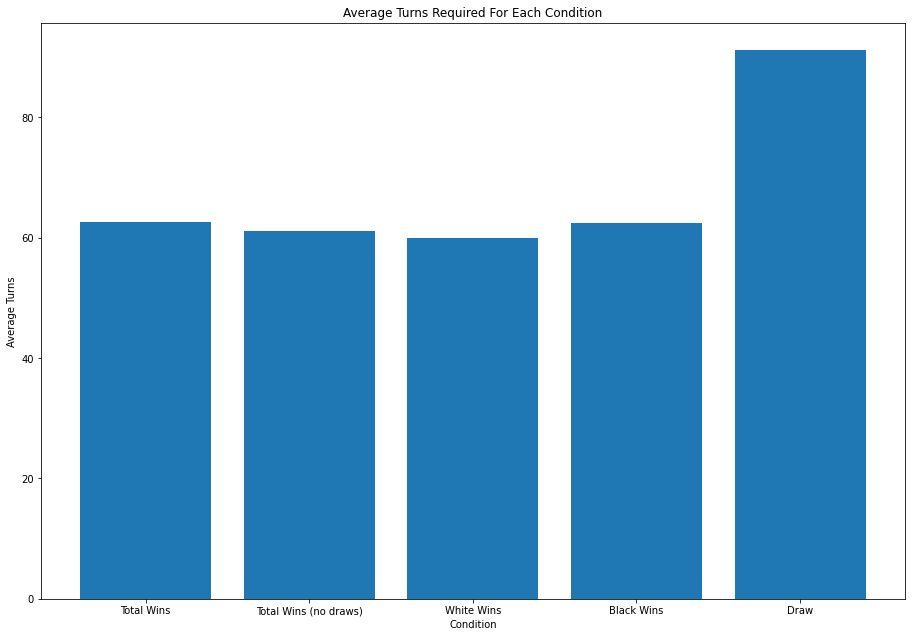

<Figure size 1440x1440 with 0 Axes>

In [13]:
def sum_of_wins(x1,x2):
    return int(x1) + int(x2)

white_wins = list(filter(lambda x : x["winner"] == "white", data))
for i in range(len(white_wins)):
    white_wins[i] = white_wins[i]["turns"]
white_wins_mean = (reduce(sum_of_wins, white_wins,0))/len(white_wins)

black_wins = list(filter(lambda x : x["winner"] == "black", data))
for i in range(len(black_wins)):
    black_wins[i] = black_wins[i]["turns"]
black_wins_mean = (reduce(sum_of_wins, black_wins,0))/len(black_wins)

total_draws = list(filter(lambda x : x["winner"] == "draw", data))
for i in range(len(total_draws)):
    total_draws[i] = total_draws[i]["turns"]
total_draws_mean = (reduce(sum_of_wins, total_draws,0))/len(total_draws)

total_games_no_draws = list(filter(lambda x : x["winner"] != "draw", data))
for i in range(len(total_games_no_draws)):
    total_games_no_draws[i] = total_games_no_draws[i]["turns"]
total_games_no_draws_mean = (reduce(sum_of_wins, total_games_no_draws,0))/len(total_games_no_draws)

total_games = list(filter(lambda x : x["winner"] != "", data))
for i in range(len(total_games)):
    total_games[i] = total_games[i]["turns"]
total_games_mean = (reduce(sum_of_wins, total_games,0))/len(total_games)

print('Average number of moves in a game                     : ', total_games_mean)
print('Average number of moves in a game not including draws : ', total_games_no_draws_mean)
print('Average number of moves in a game where white wins    : ', white_wins_mean)
print('Average number of moves in a game where black wins    : ', black_wins_mean)
print('Average number of moves in a game that ends in a draw : ', total_draws_mean)

fig = plt.figure(figsize=(12, 8))

ax = fig.add_axes([0,0,1,1])
conditions = ['Total Wins', 'Total Wins (no draws)', 'White Wins', 'Black Wins', 'Draw']
means = [total_games_mean, total_games_no_draws_mean, white_wins_mean, black_wins_mean, total_draws_mean]
ax.bar(conditions, means)
ax.set_ylabel('Average Turns')
ax.set_xlabel('Condition')
ax.set_title('Average Turns Required For Each Condition')
plt.figure(figsize=(20,20))
plt.show()

>**3. How do the following victory statuses correlate with rating? What conclusions can be drawn from the data collected?**<br>
>  a) Checkmate<br>
>  b) Resignation<br>
>  c) Timeout <br>

>As demonstrated by the graph, different victory statuses do correlate with rating.  What the data shows us is that a higher rated player is more likely to resign or run out of time, where a lower rated player is more likely to have a checkmate.

>To find how the following victory statuses correlate with rating, I first had to find the average rating of each victory status.  This was done by applying a filter to get a list only containing games of each specific victory status.  I then used a for loop to turn the list into a list of integers which could then go into a reduce function to add up the ratings. Finally, I divided the ratings by the size of the list to get the mean rating for each victory condition.

>The main challenge that I faced was when I tried to compare the results of the three victory statuses.  The first solution that I had was to add in the average rating for all games, however, the total rating of all games includes the ratings from games that ended in a draw.  To fix this I had to change the total_games to include all victory statuses except for draw games.

Average rating in a game not including draws :  1593.3930287648054
Average rating in a checkmate game           :  1528.5060574948666
Average rating in a resign game              :  1627.9815936626283
Average rating in a timeout game             :  1607.845193035579


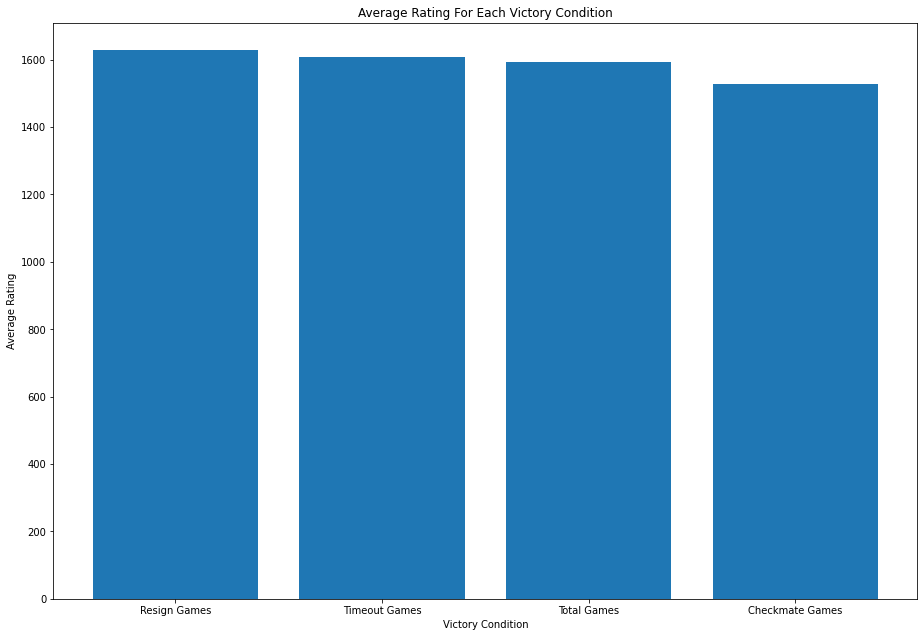

<Figure size 1440x1440 with 0 Axes>

In [14]:
def sum_of_ratings(x1,x2):
    return x1 + x2

checkmate_games = list(filter(lambda x : x["victory_status"] == "mate", data))
for i in range(len(checkmate_games)):
    checkmate_games[i] = (float(checkmate_games[i]["white_rating"]) + float(checkmate_games[i]["black_rating"]))/2
checkmate_games_mean = (reduce(sum_of_ratings, checkmate_games,0))/len(checkmate_games)

resign_games = list(filter(lambda x : x["victory_status"] == "resign", data))
for i in range(len(resign_games)):
    resign_games[i] = (float(resign_games[i]["white_rating"]) + float(resign_games[i]["black_rating"]))/2
resign_games_mean = (reduce(sum_of_ratings, resign_games,0))/len(resign_games)

timeout_games = list(filter(lambda x : x["victory_status"] == "outoftime", data))
for i in range(len(timeout_games)):
    timeout_games[i] = (float(timeout_games[i]["white_rating"]) + float(timeout_games[i]["black_rating"]))/2
timeout_games_mean = (reduce(sum_of_ratings, timeout_games,0))/len(timeout_games)

total_games = list(filter(lambda x : x["victory_status"] != "draw", data))
for i in range(len(total_games)):
    total_games[i] = (float(total_games[i]["white_rating"]) + float(total_games[i]["black_rating"]))/2
total_games_mean = (reduce(sum_of_ratings, total_games,0))/len(total_games)

print('Average rating in a game not including draws : ', total_games_mean)
print('Average rating in a checkmate game           : ', checkmate_games_mean)
print('Average rating in a resign game              : ', resign_games_mean)
print('Average rating in a timeout game             : ', timeout_games_mean)

fig = plt.figure(figsize=(12, 8))

ax = fig.add_axes([0,0,1,1])
conditions = ['Resign Games', 'Timeout Games', 'Total Games', 'Checkmate Games']
means = [resign_games_mean, timeout_games_mean, total_games_mean, checkmate_games_mean]
ax.bar(conditions, means)
ax.set_ylabel('Average Rating')
ax.set_xlabel('Victory Condition')
ax.set_title('Average Rating For Each Victory Condition')
plt.figure(figsize=(20,20))
plt.show()

>**4.a List the top 5 highest win rate openings, what are their win rates?<br>
4.b Do their win rates vary depending on piece colour?<br>
4.c What conclusions can be drawn from the data collected?**

4.a: The top 5 winrates are listed in the table below for both colours, white & black.

4.b: The winrates for each opening vary greatly depending on which side they are played.
For example, the philidor defense has a 61% wr on white while black has a 39% winrate playing this opening.

4.c: These statistics confirm the idea that openings were designed for each side and made to create significant advantages through a strategic plan of events at the beginning of the game.
These advantages then increases their chances of winning the game overall, leading to a higher winrate to those who use these specific openings depending on which side you're on.

                                                                                opening_name  white_winrate
Four Knights Game: Italian Variation                    Four Knights Game: Italian Variation       0.604651
Philidor Defense                                                            Philidor Defense       0.615385
Scandinavian Defense: Mieses-Kotroc Variation  Scandinavian Defense: Mieses-Kotroc Variation       0.621212
Philidor Defense #3                                                      Philidor Defense #3       0.648276
Queen's Gambit Refused: Marshall Defense            Queen's Gambit Refused: Marshall Defense       0.715686
                                                      opening_name  black_winrate
Indian Game                                            Indian Game       0.541353
Sicilian Defense: Bowdler Attack  Sicilian Defense: Bowdler Attack       0.557851
Queen's Pawn Game                                Queen's Pawn Game       0.574257
Sicilian Defense: Old Si

Text(0, 0.5, 'name')

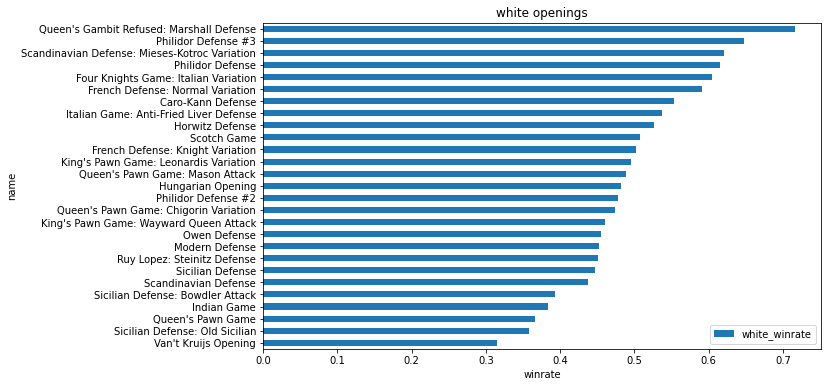

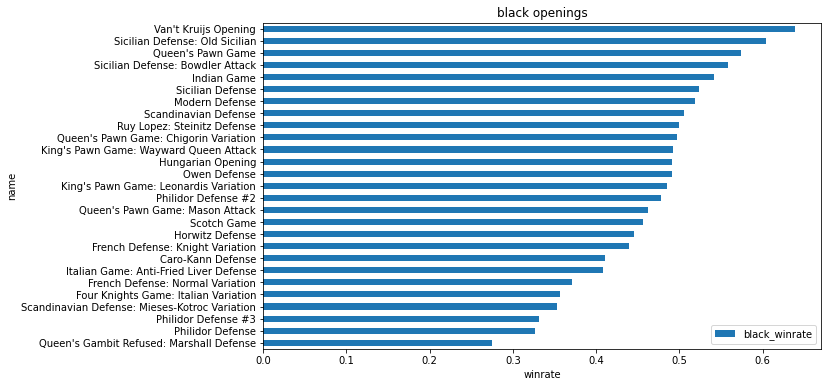

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame (data, columns = ['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'])
opening_names = df['opening_name'].unique()
w_opening_winrates = []
b_opening_winrates = []
remove_list = []

#Find the winrate of each unique opening with total games > 100 being played
for i in range(len(opening_names)):
    total_games = sum(df['opening_name'] == opening_names[i]);
    white = df.loc[(df['opening_name'] == opening_names[i]) & (df['winner'] == 'white')]
    white_winrate = len(white['winner'])/total_games
    
    black = df.loc[(df['opening_name'] == opening_names[i]) & (df['winner'] == 'black')]
    black_winrate = len(black['winner'])/total_games
    
    if (total_games > 100):
        w_opening_winrates.append(white_winrate)
        b_opening_winrates.append(black_winrate)
    else:
        remove_list.append(opening_names[i])
        
opening_names = [x for x in opening_names if x not in remove_list]
    
#Create dataframe with each opening and their winrates sorted by White winrate descending
d = {'opening_name': opening_names, 'white_winrate': w_opening_winrates}
w_openings = pd.DataFrame(data = d)
w_openings.index = list(w_openings['opening_name'])
w_openings = w_openings.sort_values(by=['white_winrate'])
w_openings

#Print white openings and winrates table + graph
print(w_openings.tail().to_string())
w_openings.plot.barh(figsize=(10,6))
plt.title("white openings")
plt.xlabel("winrate")
plt.ylabel("name")

#Create dataframe with each opening and their winrates sorted by Black winrate descending
c = {'opening_name': opening_names, 'black_winrate': b_opening_winrates}
b_openings = pd.DataFrame(data = c)
b_openings.index = list(b_openings['opening_name'])
b_openings = b_openings.sort_values(by=['black_winrate'])
b_openings

#Print black openings and winrates table + graph
print(b_openings.tail().to_string())
b_openings.plot.barh(figsize=(10,6))
plt.title("black openings")
plt.xlabel("winrate")
plt.ylabel("name")

>**5.a What is the relationship between the least and most common chess openings and their play rates?<br>
5.b Does the trend indicate increasing or decreasing volatility in victory results?<br>
5.c What conclusions can be drawn from the data collected?**

>The relationship between the most common openings and their play rates showed a relatively equal distribution of wins between black and white, with a small percentage of that being draws, for all 10 openings. Only around 2-6% were draws for these openings. As for the least common openings, there were some moves that had a much larger lean towards white or black. For instance, 'Budapest Defense' had a heavy lean towards black with a 78% win rate. But the opening, 'Danish Gambit Accepted' gave a greater advantage to white with a win rate of 65%. In terms of the draw rates, they were relatively low in terms of wins, with the highest win rate being 8%.

>These results indictate that the more common openings lead to a more equal chance for both parties to win, as the win rates for these moves are reasonably balanced. As for the least common openings, they are more likely to favour one person over the other. This makes the volatility of these moves much higher than that of the more common openings due to the fact that the risk of losing is much greater depending on which opening is played. This makes them less popular in a tournament setting as a players chance of winning is reduced by a significant amount simply due to the opening move, which puts the other player at a great advantage.

>Though these less common moves have a much greater risk attached to them, having this information about them could be very beneficial when it comes to creating strategies to win a game of chess.

In [350]:
frame = pd.DataFrame(data)
frame

all_openings = []

#Edit the opening moves to not include variations.
for opening in frame['opening_name']:
    temp = ""
    if " | " in opening:
        temp = opening.split(" | ")
        temp = temp[0].split(": ")
    else:
        temp = opening.split(": ")
    all_openings.append(temp[0])

#Edit 'opening_name' column of dataframe so the opening_names are the ones
#without variations.
frame['opening_name'] = all_openings

unique_openings = pd.unique(all_openings)

#Find the most and least common opening moves by creating a dictionary of 
#all the moves, and how many times they were played.
opening_count = {'Opening': [], 'Count': []} 

for opening in unique_openings:
    opening_count['Opening'].append(opening)

result = 0
for opening in opening_count['Opening']:
    result = len(list(filter(lambda i: i == opening, frame['opening_name'])))
    opening_count['Count'].append(result)
    result = 0

df_count = pd.DataFrame(opening_count)
df_count = df_count.set_index('Opening')
df_count = df_count.sort_values(by='Count', ascending=False)

most_common = df_count.head(10)
least_common = df_count.tail(10)

print("The top 10 most common opening moves are:\n", most_common )
print("The top 10 least common opening moves are:\n", least_common)

The top 10 most common opening moves are:
                       Count
Opening                    
Sicilian Defense       2012
French Defense         1077
Queen's Pawn Game       801
Italian Game            774
King's Pawn Game        708
Ruy Lopez               641
Scandinavian Defense    563
English Opening         547
Caro-Kann Defense       458
Scotch Game             365
The top 10 least common opening moves are:
                      Count
Opening                   
System                   1
Irish Gambit             1
Australian Defense       1
Doery Defense            1
Semi-Bononi              1
Alekhine Defense #3      1
Petrov's Defense #4      1
Carr Defense             1
Valencia Opening         1
Rubinstein Opening       1


>The top 10 least common opening moves were only played once in the entirety of the dataset, which makes it challenging to get an accurate estimate for the play rates. So for the least common opening moves, I will eliminate the openings that are present in the dataset less than 20 times. This way the comparison of the most and least common openings will be more accurate.

In [351]:
new_count = df_count.loc[df_count['Count'] >= 20]

new_most_common = new_count.head(10)
new_least_common = new_count.tail(10)
print("The top 10 most common opening moves are:\n", new_most_common )
print("The top 10 least common opening moves are:\n", new_least_common )

The top 10 most common opening moves are:
                       Count
Opening                    
Sicilian Defense       2012
French Defense         1077
Queen's Pawn Game       801
Italian Game            774
King's Pawn Game        708
Ruy Lopez               641
Scandinavian Defense    563
English Opening         547
Caro-Kann Defense       458
Scotch Game             365
The top 10 least common opening moves are:
                         Count
Opening                      
Mikenas Defense            25
Petrov's Defense #2        24
Trompowsky Attack          24
Danish Gambit Accepted     23
Philidor Defense #4        23
Danish Gambit              23
Budapest Defense           23
Grob Opening               22
Tarrasch Defense           21
East Indian Defense        20


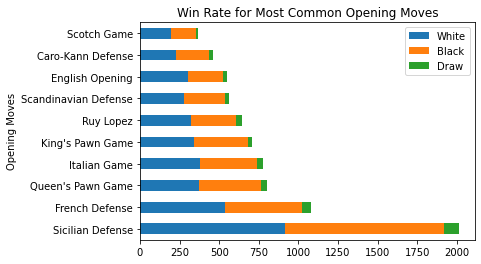

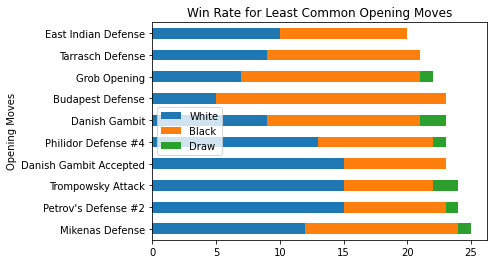

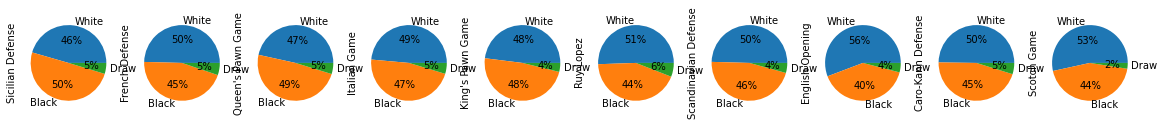

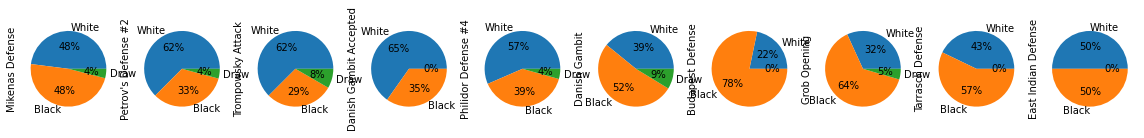

In [352]:
#Find the white/black/draw rates for each opening move.
opening_rates = {}

for opening in unique_openings:
    opening_rates[opening] = {'White': 0, 'Black': 0, 'Draw': 0}


for i in range(len(frame['opening_name'])):
    if (frame['winner'][i] == 'white'):
        opening_rates[frame['opening_name'][i]]['White'] += 1
    if (frame['winner'][i] == 'black'):
        opening_rates[frame['opening_name'][i]]['Black'] += 1
    if (frame['winner'][i] == 'draw'):
        opening_rates[frame['opening_name'][i]]['Draw'] += 1

#Find relationship for all opening moves.   
relationship_1 = pd.DataFrame(opening_rates)
relationship_1 = relationship_1.transpose()

relationship_1_white = relationship_1.sort_values(by=['White'])
relationship_1_black = relationship_1.sort_values(by=['Black'])
relationship_1_draw = relationship_1.sort_values(by=['Draw'])

relationship_1 = relationship_1.sort_values(by=['White', 'Black', 'Draw'])

#Find relationships for most and least common opening moves only.
most_common_names = []
least_common_names = []

current = new_count.reset_index()

current_most = current.head(10)
current_least = current.tail(10)

for name in current_most['Opening']:
    most_common_names.append(name)
    
for name in current_least['Opening']:
    least_common_names.append(name)

most_common = {i: opening_rates[i] for i in most_common_names if i in opening_rates}
least_common = {i: opening_rates[i] for i in least_common_names if i in opening_rates}

df_most = pd.DataFrame(most_common)
df_most = df_most.transpose()
df_most.plot(kind='barh', stacked=True, xlabel="Opening Moves", title="Win Rate for Most Common Opening Moves");

df_least = pd.DataFrame(least_common)
df_least = df_least.transpose()
df_least.plot(kind='barh', stacked=True, xlabel="Opening Moves", title="Win Rate for Least Common Opening Moves");

df_most.transpose().plot.pie(legend=None, subplots=True, autopct='%.0f%%', figsize=(20,10));
df_least.transpose().plot.pie(legend=None, subplots=True, autopct='%.0f%%', figsize=(20,10));

>**6. Is there a correlation between how many variations and moves there are in an opening has and how often it is played?**

In [14]:
most_played = {}
most_played_names = openings
most_played_counters = original_counters
for i in range(10):
    most = 0
    most_index = 0;
    for i in range(len(most_played_counters)):
        if most_played_counters[i] > most:
            most = most_played_counters[i]
            most_index = i
    most_played[most_played_names[most_index]] = most_played_counters[most_index]
    most_played_names.remove(most_played_names[most_index])
    most_played_counters.remove(most_played_counters[most_index])
most_played_df = pd.DataFrame.from_dict(most_played, orient="index")
most_played_df.rename(columns={0: "Top Ten Games Played By Opening"}, inplace=True)
most_played_df

,Top Ten Games Played By Opening
Italian Game,774
King's Pawn Game,708
Ruy Lopez,641
Scandinavian Defense,563
English Opening,547
Caro-Kann Defense,458
Scotch Game,365
Queen's Gambit Declined,318
Van't Kruijs Opening,282
Four Knights Game,267


Text(0, 0.5, 'Games Played')

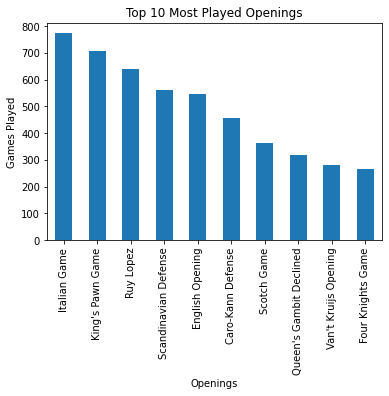

In [15]:
most_played_df.plot.bar(title="Top 10 Most Played Openings", legend=None)
plt.xlabel("Openings")
plt.ylabel("Games Played")

In [16]:
least_played = {}
least_played_names = openings
least_played_counters = original_counters
for i in range(10):
    least = least_played_counters[0]
    least_index = 0;
    for i in range(len(least_played_counters)):
        if least_played_counters[i] < least:
            least = least_played_counters[i]
            least_index = i
    least_played[least_played_names[least_index]] = least_played_counters[least_index]
    least_played_names.remove(least_played_names[least_index])
    least_played_counters.remove(least_played_counters[least_index])
least_played_df = pd.DataFrame.from_dict(least_played, orient="index")
least_played_df.rename(columns={0: "10 Least Games Played By Opening"}, inplace=True)
least_played_df

,10 Least Games Played By Opening
Global Opening,1
System,1
Irish Gambit,1
Doery Defense,1
Carr Defense,1
Australian Defense,1
Valencia Opening,1
Petrov's Defense #4,1
Alekhine Defense #3,1
Semi-Bononi,1


Text(0, 0.5, 'Games Played')

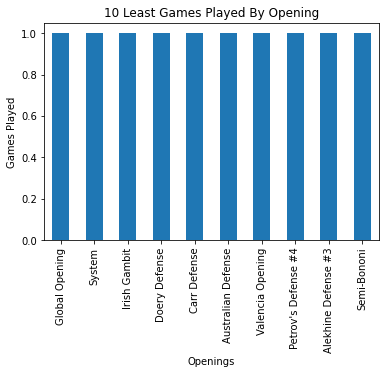

In [17]:
least_played_df.plot.bar(title="10 Least Games Played By Opening", legend=None)
plt.xlabel("Openings")
plt.ylabel("Games Played")

In [18]:
newopenings = []
for i in data:
    partition = ""
    if " | " in i["opening_name"]:
        partition = i["opening_name"].split(" | ")
        partition = partition[0].split(": ")
    else:
        partition = i["opening_name"].split(": ")
    new = True
    for j in range(len(newopenings)):
        if newopenings[j] == partition[0]:
            new = False
            break
    if new:
        newopenings.append(partition[0])

count = {}
for i in newopenings:
    temp = []
    for j in data:
        partition = ""
        if " | " in j["opening_name"]:
            partition = j["opening_name"].split(" | ")
            partition = partition[0].split(": ", 2)
        else:
            partition = j["opening_name"].split(": ", 2)
        if partition[0] == i:
            if ": " in j["opening_name"] or " | " in j["opening_name"]:
                if (len(partition) > 1):
                    temp.append(partition[1])
                else:
                    temp.append(partition[0])
    count[i] = len(list(dict.fromkeys(temp)))
variation_count = {}
for i in most_played.keys():
    for j in count.keys():
        if i == j:
            variation_count[j] = count[j]
opening_df = pd.DataFrame.from_dict(variation_count, orient="index")
opening_df.rename(columns={0: "Top 10 Games Variation Count"}, inplace=True)
opening_df

,Top 10 Games Variation Count
Italian Game,18
King's Pawn Game,22
Ruy Lopez,23
Scandinavian Defense,17
English Opening,19
Caro-Kann Defense,24
Scotch Game,16
Queen's Gambit Declined,29
Van't Kruijs Opening,0
Four Knights Game,8


Text(0, 0.5, 'Variation Count')

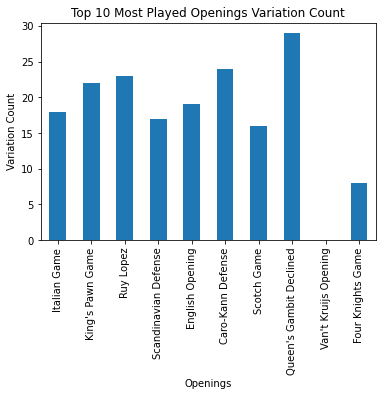

In [19]:
top_ten_variations = {}
for i in most_played.keys():
    for j, k in opening_df.iterrows():
        if j == i:
            top_ten_variations[i] = k[0]
            break
top_ten_df = pd.DataFrame.from_dict(top_ten_variations, orient="index")
top_ten_df.rename(columns={0: "Variation Count"}, inplace=True)
top_ten_df.plot.bar(title="Top 10 Most Played Openings Variation Count", legend=None)
plt.xlabel("Openings")
plt.ylabel("Variation Count")

In [20]:
least_variation_count = {}
for i in least_played.keys():
    for j in count.keys():
        if i == j:
            least_variation_count[j] = count[j]
least_opening_df = pd.DataFrame.from_dict(least_variation_count, orient="index")
least_opening_df.rename(columns={0: "10 Least Played Openings Variation Count"}, inplace=True)
least_opening_df

,10 Least Played Openings Variation Count
Global Opening,0
System,1
Irish Gambit,0
Doery Defense,0
Carr Defense,0
Australian Defense,0
Valencia Opening,0
Petrov's Defense #4,0
Alekhine Defense #3,0
Semi-Bononi,0


Text(0, 0.5, 'Variation Count')

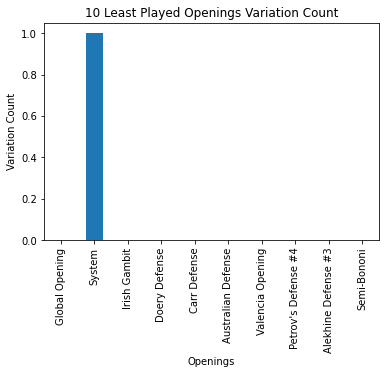

In [21]:
bot_ten_variations = {}
for i in least_played.keys():
    for j, k in least_opening_df.iterrows():
        if j == i:
            bot_ten_variations[i] = k[0]
            break
bot_ten_df = pd.DataFrame.from_dict(bot_ten_variations, orient="index")
bot_ten_df.rename(columns={0: "Variation Count"}, inplace=True)
bot_ten_df.plot.bar(title="10 Least Played Openings Variation Count", legend=None)
plt.xlabel("Openings")
plt.ylabel("Variation Count")

In [22]:
top_ten_moves = {}
for i in most_played.keys():
    for j in data:
        if j["opening_name"] == i:
            top_ten_moves[i] = int(j["opening_ply"])
            break
move_df = pd.DataFrame.from_dict(top_ten_moves, orient="index")
move_df.rename(columns={0: "Number of Moves in the Top 10 Most Played Opening"}, inplace=True)
move_df

,Number of Moves in the Top 10 Most Played Opening
Italian Game,5
King's Pawn Game,2
Ruy Lopez,5
Scandinavian Defense,2
English Opening,1
Caro-Kann Defense,2
Scotch Game,5
Queen's Gambit Declined,4
Van't Kruijs Opening,1
Four Knights Game,6


Text(0, 0.5, 'Number of Moves')

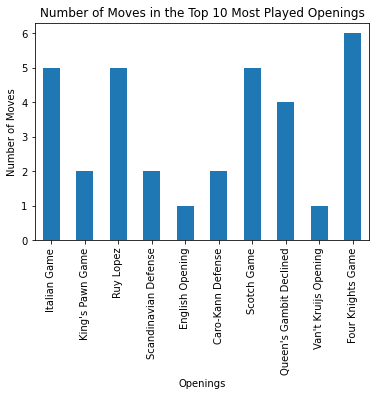

In [23]:
move_df.plot.bar(title="Number of Moves in the Top 10 Most Played Openings", legend=None)
plt.xlabel("Openings")
plt.ylabel("Number of Moves")

In [24]:
bot_ten_moves = {}
for i in least_played.keys():
    for j in data:
        if j["opening_name"] == i:
            bot_ten_moves[i] = int(j["opening_ply"])
            break
bot_move_df = pd.DataFrame.from_dict(bot_ten_moves, orient="index")
bot_move_df.rename(columns={0: "Number of Moves in the 10 Least Played Openings"}, inplace=True)
bot_move_df

,Number of Moves in the 10 Least Played Openings
Global Opening,3
Irish Gambit,5
Doery Defense,4
Carr Defense,2
Australian Defense,2
Valencia Opening,3
Petrov's Defense #4,7
Alekhine Defense #3,7
Semi-Bononi,6


Text(0, 0.5, 'Number of Moves')

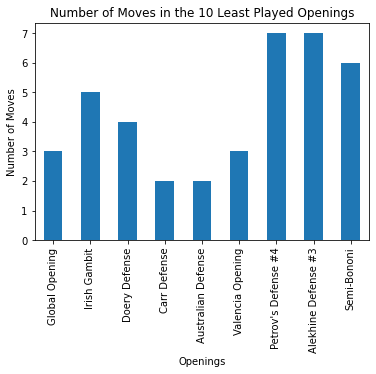

In [25]:
bot_move_df.plot.bar(title="Number of Moves in the 10 Least Played Openings", legend=None)
plt.xlabel("Openings")
plt.ylabel("Number of Moves")

**Findings**
- The more variations an opening has, the more it is played
- The more moves an opening has, the less it is played

## <span style="color:blue"> Potential Data Analysis:</span>
>This dataset has a lot of potential when it comes to Data Science. Chess is a very complex game with hundreds of variations for every move. This creates an excellent platform to test machine learning. There have been many instances of machine learning associated with Chess, as many chess players will utilize some form of AI to help analyze their own games as well as their opponents games, not only to help gain a better understanding of game theory, but to keep a few tricks up their sleeves. Further development of these kinds of AI are on the rise and Data Science and Data Analysis will only help to move it along. One way to utilize machine learning in chess is to let the AI analyze the game and create its own strategies. But if the goal is to be advantageous, then it would be beneficial to introduce this dataset. 

>Through our analysis, we were able to find ways to estimate the outcome of a game of chess, depending on various factors. Such as the colour you are playing, which opening move you make, the amount of overall moves it takes to complete the game, and a players rating. For example, we were able to determine that if the number of moves played goes above the average of approximately 62 moves then black is more likely to win. Whereas if the number of moves is below the average, white is more likely to win the game. When it comes to the opening moves, there were some moves that gave one colour a better chance of winning over the other. The more common openings were ones that gave both players a relatively equal chance of winning. But most of the less common openings gave a distinct advantage to one player. This insight into the different ways players have won can be incredibly powerful, as it can be used to create a plan that optimizes one's chances of winning, before even seeing the board.

>Therefore our analysis shows that learning from this dataset would allow for a machine to create better, more accurate predictions about the outcome of chess games.


## <span style="color:blue"> Conclusion:</span>